In [2]:
import numpy as np
from scipy import integrate
def f2(x):
    return np.exp(-x)

integrate.quad(f2, 0.0, np.inf)

(1.0000000000000002, 5.842606742906004e-11)

в случая trapz(), simps() и romb() сетка устранавливается пользователем

In [3]:
def f(y, x):
    return -2.0 * y

xi = np.linspace(0, 1, 10)
y0 = 1.0
sol = integrate.odeint(f, y0, xi)
sol

array([[1.        ],
       [0.80073742],
       [0.64118042],
       [0.51341714],
       [0.41111231],
       [0.329193  ],
       [0.26359714],
       [0.21107209],
       [0.16901331],
       [0.13533527]])

In [4]:
sol[0]

array([1.])

In [5]:
sol[9]

array([0.13533527])

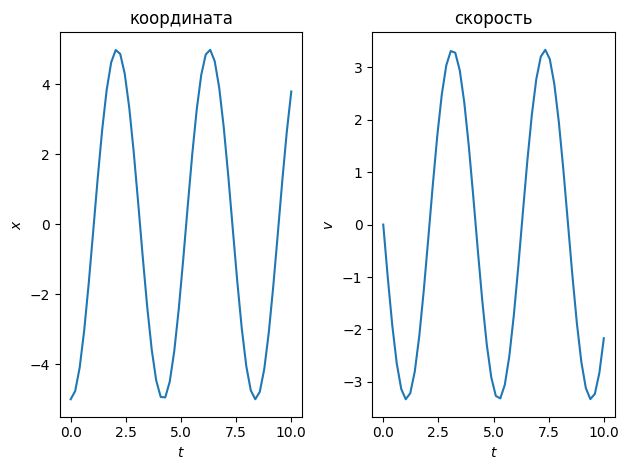

In [18]:
# подключение модуля pyplot из библиотеки matplotlib # под псевдонимом plt
from matplotlib import pyplot as plt
# частота гармонического осциллятора
w = 1.5
# вектор-функция правых частей уравнений:
# f = [f0, f1], где f0 = -w^2*x, f1 = v.
# полагается, что f зависит от (y, t), причём y - это # список из двух чисел:
# y = [v, x]
def f(y, t):
    v = y[0]
    x = y[1]
    f0 = -w**2 * x
    f1 = v
    return [f0, f1]
# массив точек интегрирования
ti = np.linspace(0, 10, 50)
# начальная координата
x0 = -5.0
# начальная скорость
v0 = 0.0
# список начальных условий
y0 = [x0, v0]
# решение ОДУ
sol = integrate.odeint(f, y0, ti)
# рисунок для построения графиков функций x(t) и v(t)
fig = plt.figure()
# панель для рисования графика координаты
ax1 = fig.add_subplot(121)
# панель для рисования графика скорости
ax2 = fig.add_subplot(122)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$x$')
ax1.set_title('координата')
# график x(t) - зависимость нулевого столбца вектора # решения sol от ti
ax1.plot(ti, sol[:, 0])
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$v$')
ax2.set_title('скорость')
# график v(t) - зависимость первого столбца вектора # решения sol от ti
ax2.plot(ti, sol[:, 1])
# настройка оптимального расположения панелей
plt.tight_layout()
plt.show()

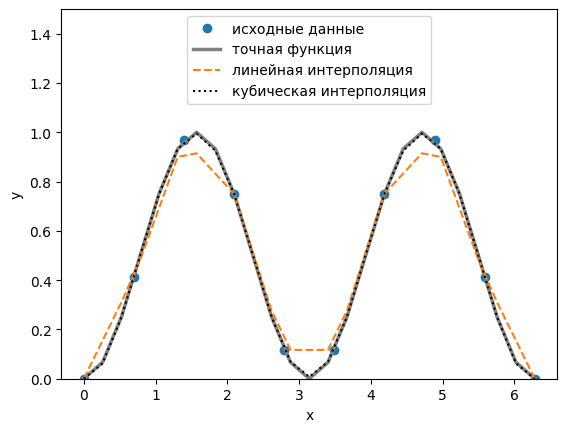

In [7]:
#Интерполяция

from scipy.interpolate import interp1d
# функция для генерации данных,
# по которым будет строиться интерполяция
def f_exact(x):
    return np.sin(x)**2
# массив координат, по которым будет делаться интерполяция
x = np.linspace(0, 2.0 * np.pi, 10)
# массив значений, по которым будет делаться интерполяция
y = f_exact(x)
# интерполяция данных методом по умолчанию # (линейная интерполяция)
fi_1 = interp1d(x, y)
# кубическая интерполяция
fi_2 = interp1d(x, y, 'cubic')
# массив координат для построения # графика интерполированных функций
xi = np.linspace(0, 2.0 * np.pi, 25)
# массивы значений интерполированых функций # для построения графиков
yi_1 = fi_1(xi)
yi_2 = fi_2(xi)
# настройки осей
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0.0, 1.5)
# рисование графиков
plt.plot(x, y, 'o', label='исходные данные')
plt.plot(xi, f_exact(xi), '-', color='grey', linewidth=2.5, label='точная функция')
plt.plot(xi, yi_1, '--', label='линейная интерполяция')
plt.plot(xi, yi_2, 'k:', label='кубическая интерполяция')
# легенда, располагающаяся сверху по центру панели
plt.legend(loc='upper center')
plt.show()

1. Результатом работы функции integrate.quad() является кортеж из двух чисел. Что это за числа?

-> Значение интеграла и точность, при решении

2. В каком модуле SciPy содержатся функции для решения обык- новенных дифференциальных уравнений?

->scipy.integrate

3. Для решения систем ОДУ какого вида предназначена функция odeint()?
-> dy'/dx = f'(y',x)

y(x0) = y0, где

y' = [y^0, y^1,...y^(n-1)]

f' = [f^0, f^1,...y^(n-1)]

y0' = [y0^0, y0^1,...y0^(n-1)]

#4 .Воспользуйтесь функцией help() и выясните, какие функции помимо odeint() имеются в модуле integrate для решения обыкно- венных дифференциальных уравнений.

solve_ivp(fun, t_span, y0[, method, t_eval, ...]) - Solve an initial value problem for a system of ODEs.
RK23(fun, t0, y0, t_bound[, max_step, rtol, ...]) - Explicit Runge-Kutta method of order 3(2).
RK45(fun, t0, y0, t_bound[, max_step, rtol, ...]) - Explicit Runge-Kutta method of order 5(4).
DOP853(fun, t0, y0, t_bound[, max_step, ...])     - Explicit Runge-Kutta method of order 8.
Radau(fun, t0, y0, t_bound[, max_step, ...])      - Implicit Runge-Kutta method of Radau IIA family of order 5.
BDF(fun, t0, y0, t_bound[, max_step, rtol, ...])  - Implicit method based on backward-differentiation formulas.
LSODA(fun, t0, y0, t_bound[, first_step, ...])    - Adams/BDF method with automatic stiffness detection and switching.
OdeSolver(fun, t0, y0, t_bound, vectorized)       - Base class for ODE solvers.
DenseOutput(t_old, t)                             - Base class for local interpolant over step made by an ODE solver.
OdeSolution(ts, interpolants)                     - Continuous ODE solution.


Old API

odeint(func, y0, t[, args, Dfun, col_deriv, ...])  - Integrate a system of ordinary differential equations.
ode(f[, jac])                                      - A generic interface class to numeric integrators.
complex_ode(f[, jac])                              - A wrapper of ode for complex systems.


solve_bvp(fun, bc, x, y[, p, S, fun_jac, ...])     - Solve a boundary value problem for a system of ODEs.

5. Допустим, что g и f — одномерные массивы одинакового раз- мера. Поясните результат работы команды
G = interp1d(g, f, ‘cubic’)
Какой тип имеет величина G?

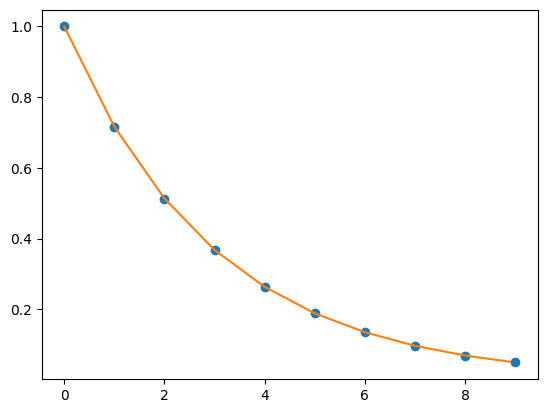

In [9]:
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()


In [17]:
type(f)


scipy.interpolate._interpolate.interp1d

G - это функция типа scipy.interpolate._interpolate.interp1d

